# 7-4.噂の広まりは Simulation できるの？
## 格子Model
都市などの空間を格子上に区切り、そのそれぞれの格子を人や家に見立てて、噂などが隣近所に広がっていく様子を示す。
>例).
> - 火災の広がり
> - 都市内での排気Gas や温室効果Gas の拡散

何かが広がっていくという現象を simulate する目的で広く利用される。

In [1]:
# 噂の広まりを格子Model によって simulate する
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import time
import copy

In [2]:
# Parameter設定
dt = 1  # １コマあたりの時間
dx = 1  # 隣接する格子との x方向の距離
dy = 1  # 隣接する格子との y方向の距離
num_time = 100  # Simulation を行なうコマ数
N_x = 100  # x方向の格子数
N_y = 100  # y方向の格子数
D = 0.25  # 拡散係数

In [3]:
# 初期化（初期値設定）
list_plot = []  # Animation の各コマを格納する配列
map = np.zeros((N_x, N_y))  # 縦N_y(m), 横N_x(m) の格子の状態。すべての１m 四方の格子に 0 を代入
# 中心付近を 1000 という値に改める
for i_x in range(47, 54):
    for i_y in range(47, 53):
        map[i_x][i_y] = 1000
map_pre = copy.deepcopy(map)  # 時間発展方程式を解く際に１コマを参照するために map_pre を作成

In [4]:
# 時間発展方程式
fig = plt.figure()
for t in range(1, num_time):

    # 各格子における処理
    for i_x in range(N_x):
        for i_y in range(N_y):
            # 隣接する格子の座標を求める
            i_xL = i_x - dx
            if (i_xL < 0):
                i_xL = i_x + dx
            i_xR = i_x + dx
            if (i_xR >= N_x):
                i_xR = i_x - dx
            i_yL = i_y - dy
            if (i_yL < 0):
                i_yL = i_y + dy
            i_yR = i_y + dy
            if (i_yR >= N_y):
                i_yR = i_y - dy
            # 拡散方程式を解く（隣接する格子の状態から、次の状態を決定する）
            # x方向に隣接する２つの格子との値の足しあわせたものを距離の二乗で割ったもの
            dm_x = (map_pre[i_xL][i_y] + map_pre[i_xR][i_y] - 2 * map_pre[i_x][i_y]) / (dx ** 2)
            # y方向に隣接する２つの格子との値の足しあわせたものを距離の二乗で割ったもの
            dm_y = (map_pre[i_x][i_yL] + map_pre[i_x][i_yR] - 2 * map_pre[i_x][i_y]) / (dy ** 2)
            dm = D * (dm_x + dm_y) * dt  # dm_x, dm_y に拡散係数D と、１コマあたりの時間をかけ、現在の値から増分 dm とする
            map[i_x][i_y] += dm  # 現在の値に dm を足しあわせることで、次の値とする。

    # 値の記録
    map_pre = copy.deepcopy(map)

    # 時刻ごとの Graph の描画
    plot_map = plt.imshow(map, vmin=0, vmax=10)
    list_plot.append([plot_map])
# Graph(Animation)描画
plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc("animation", html="jshtml")
plt.close()
anim

## 7-5. 経路によって変わる噂や口コミの様子をみてみよう
経路の中で噂や口コミが広がっていく様子を Simulation する。
経路が口コミなどの情報伝達や森林火災などの伝播に、どのように影響を与えるのかを見ていく。

In [1]:
# 経路内の噂の広まりを simulate する①
import pandas as pd
import matplotlib.pyplot as plt

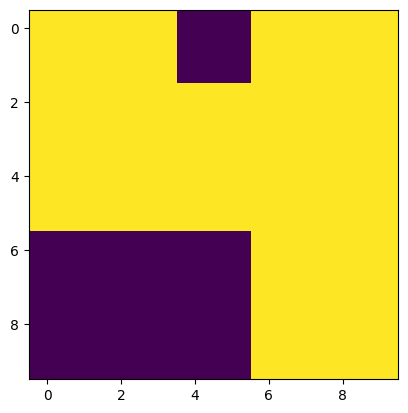

In [2]:
# 経路Data の読み込み
df_route = pd.read_csv("route.csv", header=None)
route = df_route.values

# 描画
plt.imshow(route)
plt.show()

In [3]:
# 経路内の噂の広まりを simulate する②
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import time
import copy

In [4]:
# Parameter設定
dt = 1
dx = 1
dy = 1
num_time = 100
N_x = route.shape[1]  # route.csv によって読み込まれた領域の大きさをそのまま反映
N_y = route.shape[0]  # route.csv によって読み込まれた領域の大きさをそのまま反映
D = 0.25

In [5]:
# 初期化（初期値設定）#
list_plot = []
map = np.zeros((N_x, N_y))  # 左上のいくつかのマスを 1000 とし、残りを 0 とする
for i_x in range(0, 5):
    for i_y in range(0, 5):
        map[i_x][i_y] = 1000
map = map*route
map_pre = copy.deepcopy(map)

In [6]:
# 時間発展方程式#
fig = plt.figure()
for t in range(1, num_time):

    # 各格子における処理
    for i_x in range(N_x):
        for i_y in range(N_y):
            # 隣接する格子の座標を求める
            i_xL = i_x - dx
            if (i_xL < 0):
                i_xL = i_x + dx
            i_xR = i_x + dx
            if (i_xR >= N_x):
                i_xR = i_x - dx
            i_yL = i_y - dy
            if (i_y < 0):
                i_yL = i_y + dy
            i_yR = i_y + dy
            if (i_yR >= N_y):
                i_yR = i_y - dy
            # 拡散方程式を解く（隣接する格子の状態から、次の状態を決定する）
            dm_x = (map_pre[i_xL][i_y] + map_pre[i_xR][i_y] - 2 * map_pre[i_x][i_y]) / (dx ** 2)
            dm_y = (map_pre[i_x][i_yL] + map_pre[i_x][i_yR] - 2 * map_pre[i_x][i_y]) / (dy ** 2)
            dm = D * (dm_x + dm_y) * dt
            map[i_x][i_y] += dm

    # 経路を考慮した Reset
    # 一旦、各格子における処理を領域内すべてのマスに対して行なったうえで、経路でないところを 0 とすることによって、擬似的に経路外に情報の伝達が行なわれないようにする。
    map = map * route

    # 値の記録
    map_pre = copy.deepcopy(map)

    # 時刻ごとの Graph の描画
    plot_map = plt.imshow(map, vmin=0, vmax=10)
    list_plot.append([plot_map])

# Graph(Animation)描画

plt.grid()
anim = animation.ArtistAnimation(fig, list_plot, interval=200, repeat_delay=1000)
rc("animation", html="jshtml")
plt.close()
anim

最初は徐々に経路に沿って情報の伝達が行なわれ、それが経路全体に行き渡ったかに見えるが、最後は徐々に風化していく様子が確認される。